In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import timeit
import networkx as nx
from Bio.PDB import PDBParser
import pandas as pd
import faiss
import surface
from scipy.spatial import distance_matrix
from rdkit import Chem
import py3Dmol
from rdkit.Chem import AllChem


In [2]:
molecules_npydir = "/auto/datasets/npi/raw/01-benchmark_surfaces_npy"
gen = os.walk(molecules_npydir)
root, dirs, files = tuple(next(gen))
xyz_files_itr = filter(lambda x: x.rpartition("_")[2] == "atomxyz.npy", files)
names = list(map(lambda x: x.rpartition("_")[0], xyz_files_itr))
natoms_of = {}
for name in names:
    coords = np.load(f"{molecules_npydir}/{name}_atomxyz.npy") 
    natoms_of[name] = coords.shape[0]
    #print(name, coords.shape[0])

In [3]:
items = list(natoms_of.items())
items.sort(key = lambda x: x[1])
print(items) 

[('1y1y_P', 4), ('1y1y_T', 7), ('3pa0_CD', 8), ('173d_D', 14), ('3pgw_DM', 16), ('3go3_CD', 20), ('1xvr_DE', 20), ('5ytz_DF', 20), ('5yty_DF', 20), ('6l74_I', 22), ('6ymw_C', 23), ('6oy5_I', 23), ('4i2h_C', 24), ('173d_CD', 28), ('209d_C', 30), ('2d55_C', 30), ('316d_C', 30), ('2d7h_E', 31), ('1g3x_M', 32), ('2dwn_E', 32), ('2dwm_E', 33), ('5k83_I', 34), ('2ok0_D', 35), ('5zkm_B', 36), ('6s0m_C', 36), ('2x1a_B', 36), ('2dwl_E', 37), ('1f0v_M', 38), ('7eh0_I', 39), ('4i2b_C', 39), ('6kcp_E', 40), ('1rh0_D', 40), ('6j7y_C', 40), ('2adw_JK', 40), ('1zn0_C', 40), ('1xf2_T', 41), ('2fdh_B', 41), ('2fdf_B', 41), ('2qfj_C', 41), ('2fd8_B', 41), ('4zhn_B', 41), ('1rxv_C', 41), ('2fdi_B', 41), ('2fdk_B', 41), ('2fdg_B', 41), ('2d7g_EF', 42), ('5uh6_I', 42), ('5uh9_I', 42), ('6rcn_C', 42), ('5x21_I', 42), ('4a3g_P', 42), ('4a3j_P', 42), ('1qln_R', 46), ('3u7h_X', 47), ('4jzu_C', 49), ('1rgt_D', 50), ('1rfi_D', 50), ('1rg1_D', 51), ('1rff_D', 51), ('4jzv_C', 51), ('2da8_A', 52), ('1rg2_D', 52), (

In [4]:
RADIUS = {}
with open("atomtype.txt") as f:
    for line in f.readlines()[1:]:
        atom = line.split()[0]
        RADIUS[atom] = line.split()[-2]

In [5]:
print(RADIUS)
print(len(RADIUS))

{'Br': '3.95559e-01', 'BR': '3.95559e-01', 'C': '3.39967e-01', 'CA': '3.39967e-01', 'CB': '3.39967e-01', 'CC': '3.39967e-01', 'CK': '3.39967e-01', 'CM': '3.39967e-01', 'CN': '3.39967e-01', 'CQ': '3.39967e-01', 'CR': '3.39967e-01', 'CT': '3.39967e-01', 'CV': '3.39967e-01', 'CW': '3.39967e-01', 'C*': '3.39967e-01', 'C0': '3.05240e-01', 'F': '3.11815e-01', 'H': '1.06908e-01', 'HC': '2.64953e-01', 'H1': '2.47135e-01', 'H2': '2.29317e-01', 'H3': '2.11499e-01', 'HA': '2.59964e-01', 'H4': '2.51055e-01', 'H5': '2.42146e-01', 'HO': '0.00000e+00', 'HS': '1.06908e-01', 'HW': '0.00000e+00', 'HP': '1.95998e-01', 'I': '4.18722e-01', 'Cl': '4.40104e-01', 'Na': '3.32840e-01', 'IB': '8.90899e-01', 'MG': '1.41225e-01', 'N': '3.25000e-01', 'NA': '3.25000e-01', 'NB': '3.25000e-01', 'NC': '3.25000e-01', 'N2': '3.25000e-01', 'N3': '3.25000e-01', 'N*': '3.25000e-01', 'O': '2.95992e-01', 'OW': '3.15061e-01', 'OH': '3.06647e-01', 'OS': '3.00001e-01', 'O2': '2.95992e-01', 'P': '3.74177e-01', 'S': '3.56359e-01',

In [6]:
# names_2 = ["3qgc_B", "4yhx_BC", "5onw_IJ", "2zjr_XY"]
# name_1 = "3qgc_B"
# molecules_npydir = "/auto/datasets/npi/raw/01-benchmark_surfaces_npy"
# coords = np.load(f"{molecules_npydir}/{name}_atomxyz.npy")
# types = np.load(f"{molecules_npydir}/{name}_atomtypes.npy")
# rs = np.array(list(map(lambda x: RADIUS[x], types)), dtype = float)
# print(len(rs))
# R = max(rs) + 10
# print(R)
# d = coords.shape[1]

In [7]:
# start_time = timeit.default_timer()
# points, atoms_ids = surface.points_with_atomsid(coords, rs, additional_rad = 10)
# time = timeit.default_timer() - start_time
# print("Total time =", time)
# print(len(points))
# print(atoms_ids)


In [8]:
print(names[-1])

1ibl_AXYZ


In [6]:
name_x = "6ml5_EF"
molecules_npydir = "/auto/datasets/npi/raw/01-benchmark_surfaces_npy"
coords = np.load(f"{molecules_npydir}/{name_x}_atomxyz.npy")
types = np.load(f"{molecules_npydir}/{name_x}_atomtypes.npy")
rs = np.array(list(map(lambda x: RADIUS[x], types)), dtype = float)
start_time = timeit.default_timer()
points, atoms_ids = surface.points_with_atomsid(coords, rs, additional_rad = 10)
time = timeit.default_timer() - start_time
print("Total time =", time)
print("Atoms on surface =", len(points))
print(points)
print(atoms_ids)
print(types.shape)
print(coords.shape)

search_neighbours_time:  0.05681702122092247 2.2184977464817948 %
search_points_time:  2.5042413035407662 97.7815022535182 %
Total time = 2.564295762218535
Atoms on surface = 637
[[ 15.48729849  14.16670272 -17.45944752]
 [ 12.8121903    8.32080913 -18.16258889]
 [ 12.48010954  11.62721054 -27.20710882]
 ...
 [ -0.36701555  26.39078845 -12.11204888]
 [ -6.26588799  21.56279989 -12.9573233 ]
 [ -4.53427753  15.83077337 -19.51447452]]
[  0   0   0   1   1   1   1   2   2   2   3   3   3   9   9  10  11  12
  13  13  14  14  14  15  15  15  19  19  19  19  20  20  20  20  22  22
  23  27  34  34  34  35  35  36  38  38  38  39  39  39  39  40  40  40
  41  41  41  42  43  45  60  60  60  60  61  61  61  63  64  64  67  79
  79  79  80  80  80  82  82  83  83  90  91  94 100 100 100 100 101 101
 101 102 103 103 103 103 104 104 104 105 105 105 112 112 122 122 122 123
 123 123 123 125 125 125 126 126 129 144 144 144 144 144 145 145 145 145
 147 147 148 151 159 161 161 161 161 164 164 164 164

In [10]:
print(len(names))

21020


In [11]:
total_time = []
mol_name = []
molecules_npydir = "/auto/datasets/npi/raw/01-benchmark_surfaces_npy"

# Определяем общее количество молекул
total_molecules = len(names)

for idx, name in enumerate(names):
    coords = np.load(f"{molecules_npydir}/{name}_atomxyz.npy")
    types = np.load(f"{molecules_npydir}/{name}_atomtypes.npy")

    try:
        rs = np.array(list(map(lambda x: RADIUS[str(x)], types)), dtype=float)
    except KeyError as e:
        print(f"Ошибка с молекулой {name}: неизвестный атом {e}. Пропуск...")
        continue  # Пропускаем молекулу с неизвестным атомом

    print(f'Processing {name}...')

    start_time = timeit.default_timer()
    points, atoms_ids = surface.points_with_atomsid(coords, rs, additional_rad=10)
    time = timeit.default_timer() - start_time
    print("Total time =", time)

    total_time.append(time)
    mol_name.append(name)

    # Вычисляем и выводим процент выполнения
    progress = (idx + 1) / total_molecules * 100
    print(f"Progress: {progress:.2f}%")

print(total_time)


Processing 4kze_R...
search_neighbours_time:  0.10589184891432524 1.2664119776660852 %
search_points_time:  8.25567222200334 98.73358802233392 %
Total time = 8.370270903222263
Progress: 0.00%
Processing 5eev_W...
search_neighbours_time:  0.048594480380415916 1.0622482097984094 %
search_points_time:  4.526087776757777 98.93775179020159 %
Total time = 4.5799851175397635
Progress: 0.01%
Processing 4b5g_UV...
search_neighbours_time:  0.013725734315812588 1.0391571034200209 %
search_points_time:  1.3071269327774644 98.96084289657998 %
Total time = 1.3226661775261164
Progress: 0.01%
Processing 6ywo_ABCD...
search_neighbours_time:  1.4224380226805806 2.1249588643782227 %
search_points_time:  65.51711768005043 97.87504113562177 %
Total time = 67.00206810981035
Progress: 0.02%
Processing 6ml5_EF...
search_neighbours_time:  0.026502588763833046 1.0628514148151085 %
search_points_time:  2.467033986002207 98.93714858518489 %
Total time = 2.496561954729259
Progress: 0.02%
Processing 6y93_CD...
sear

KeyboardInterrupt: 

In [ ]:
amount_of_atoms = []
for molecule, atom_count in items:
    for mol in mol_name:
        if mol == molecule:
            amount_of_atoms.append(atom_count)
            

print(amount_of_atoms)

[4, 7, 8, 14, 16, 20, 20, 20, 20, 22, 23, 23, 24, 28, 30, 30, 30, 31, 32, 32, 33, 34, 35, 36, 36, 36, 37, 38, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 46, 47, 49, 50, 50, 51, 51, 51, 52, 52, 53, 54, 54, 54, 54, 54, 55, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 70, 75, 75, 76, 76, 77, 78, 78, 78, 78, 78, 80, 80, 80, 80, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 88, 88, 89, 89, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 92, 92, 92, 92, 92, 93, 93, 94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 97, 97

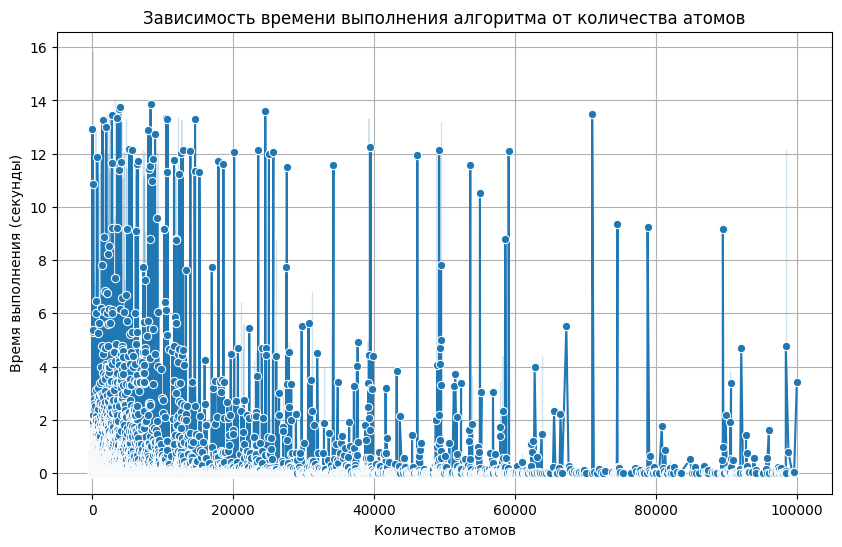

In [ ]:
import seaborn as sns
import pandas as pd
# Создаем DataFrame
data = pd.DataFrame({
    'Atoms': amount_of_atoms,
    'Execution Time': total_time,
    'Names': mol_name
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Atoms', y='Execution Time', marker='o')
plt.title('Зависимость времени выполнения алгоритма от количества атомов')
plt.xlabel('Количество атомов')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.show()

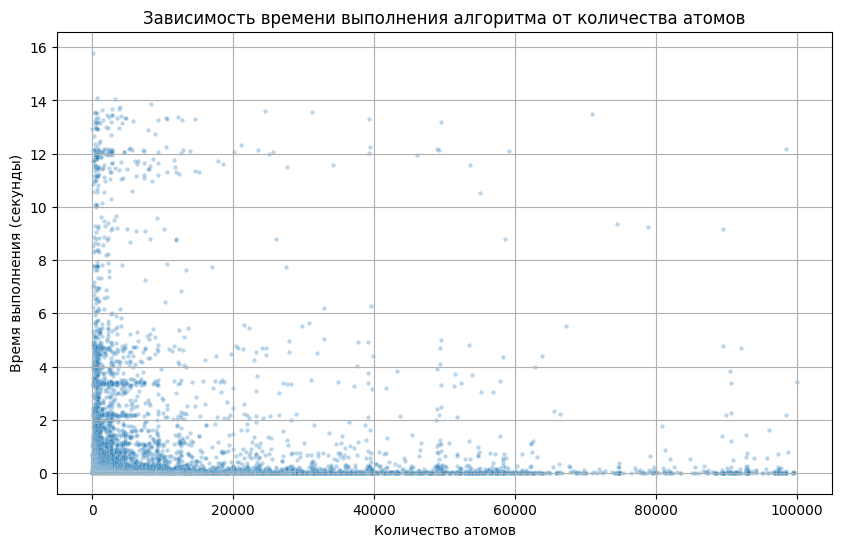

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Atoms', y='Execution Time', alpha=0.3, s=10)
plt.title('Зависимость времени выполнения алгоритма от количества атомов')
plt.xlabel('Количество атомов')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.show()

In [20]:
x = np.array([[1, 2, 3, 10], [4, 5, 6, 11], [7, 8, 9, 12]])
x.shape
mask = np.ones(x.shape[0], dtype=bool)
mask[[0, 2]] = False
x[mask]


array([[ 4,  5,  6, 11]])

In [21]:
point = np.array([0, 0])
R = 2
neighbours = np.array([[4.5, 0], [-5, 0], [0, -4.5], [0, 4.5]], float)
rs = np.array([4, 3, 3, 3], float)
res = surface.local_points(point, R, neighbours, rs)
res

[array([-1.52596836, -1.29283431])]

(-10.0, 10.0, -10.0, 10.0)

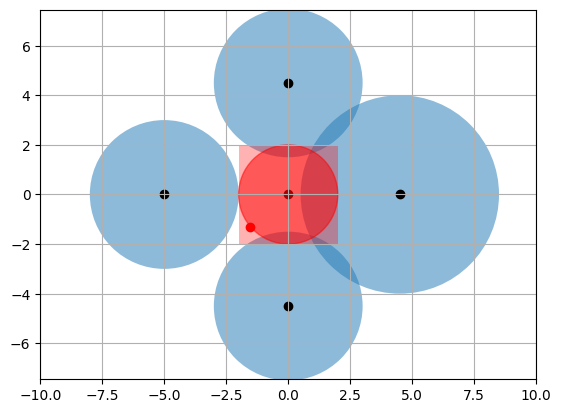

In [22]:
fig, ax = plt.subplots()
plt.axis("equal")
plt.grid()
for xyz, r in zip(neighbours, rs):
    c = plt.Circle (xyz, radius = r, alpha = 0.5)
    plt.gca().add_artist(c)
    plt.scatter(*xyz, color = "black")
plt.scatter(*point, color = "black")
for x in res:
    plt.scatter(*x, color = "red")
c = plt.Circle(point, radius = R, color = "red", alpha = 0.5)
plt.gca().add_artist(c)
plt.gca().add_patch(plt.Rectangle((point[0]-R, point[1]-R), 2 * R, 2 * R, facecolor = "red", alpha = 0.3))
plt.axis([-10, 10, -10, 10])

In [24]:
def get_atoms_from_pdb(pdb_file):
    parser = PDBParser()
    structure = parser.get_structure("protein", pdb_file)
    atoms = []
    atom_types = []
    for atom in structure.get_atoms():
        atoms.append(atom.get_coord())
        atom_types.append(atom.element)
    return np.array(atoms), atom_types

pdb_file = "/auto/datasets/masif/site/raw/01-benchmark_pdbs/your_file.pdb"
coords, atom_types = get_atoms_from_pdb(pdb_file)


FileNotFoundError: [Errno 2] No such file or directory: '/auto/datasets/masif/site/raw/01-benchmark_pdbs/your_file.pdb'

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def build_protein_graph(coords, atom_types, threshold=5.0):
    G = nx.Graph()
    
    # Добавляем вершины (атомы)
    for i, (coord, atom_type) in enumerate(zip(coords, atom_types)):
        G.add_node(i, pos=coord, atom_type=atom_type)
    
    # Вычисляем расстояния между атомами
    distances = euclidean_distances(coords, coords)
    
    # Добавляем рёбра между атомами, если расстояние меньше порога
    for i in range(len(coords)):
        for j in range(i + 1, len(coords)):
            if distances[i, j] < threshold:
                G.add_edge(i, j, weight=distances[i, j])
    
    return G

protein_graph = build_protein_graph(coords, atom_types)

In [ ]:
pos = nx.get_node_attributes(protein_graph, 'pos')  # Координаты атомов
nx.draw(protein_graph, pos, node_size=10, node_color="b", with_labels=False)
plt.show()